In [3]:
#! /usr/bin/env python2
# -*- coding:utf-8 -*-
%matplotlib inline
import matplotlib.pyplot as plt
from __future__ import division, print_function
import numpy as np
import os
from openpyxl import load_workbook
from openpyxl import Workbook
import shutil
from PIL import Image, ImageEnhance, ImageFile
import cv2
ImageFile.LOAD_TRUNCATED_IMAGES = True
# import sys
# append_module = [ '/home/guanjie/anaconda2/envs/python3/lib/python35.zip',\
#  '/home/guanjie/anaconda2/envs/python3/lib/python3.5',\
#  '/home/guanjie/anaconda2/envs/python3/lib/python3.5/plat-linux',\
#  '/home/guanjie/anaconda2/envs/python3/lib/python3.5/lib-dynload',\
#  '/home/wangya/.local/lib/python3.5/site-packages',\
#  '/home/guanjie/anaconda2/envs/python3/lib/python3.5/site-packages']
# for module in append_module:
#     if module not in sys.path:
#         sys.path.append(module)

def read_xlxs(filename):
##first read the given labels information
    wb = load_workbook(filename)
    sheetnames = wb.get_sheet_names()
    ws = wb.get_sheet_by_name(sheetnames[0])
    # get the name of the first worksheets
    rows = ws.rows
    rows = list(rows)
    content = []
    for row in rows:
        line = [col.value for col in row]
        content.append(line)
    return content

def create_dictionary(content):
    label_dic = {}
    num_primary = 0
    for t in content[1:]:
        if t[1] in label_dic.keys():
            label_dic[t[1]].append(t)
        else:
            label_dic[t[1]] = []
            label_dic[t[1]].append(t)
            num_primary += 1

    num_data_primary = np.zeros(num_primary)
    name_primary = []
    order = 0
    for key in label_dic:
        name_primary.append(key)
        num_data_primary[order] = len(label_dic[key])
        order += 1
    sorted_order = np.argsort(num_data_primary)
    ordered_name_primary = []
    new_content = []
    for i in sorted_order:
        new_content.append([])
        ordered_name_primary.append(name_primary[i])
        for wine_info in label_dic[name_primary[i]]:
            new_content[-1].append(wine_info)
    num_data_primary = num_data_primary[sorted_order]

    return label_dic, ordered_name_primary, num_data_primary, new_content

###########################################################################################################################
def contrast(image_dir,save_dir, index):
    image = Image.open(image_dir)
    img_id = os.path.split(image_dir)[-1].split('.')[0]
    random_factor = np.random.randint(8, 16) / 10.  # 随机因子
    color_image = ImageEnhance.Contrast(image).enhance(random_factor)  # 调整图像对比度
    color_image = color_image.convert('RGB')
    color_image.save(os.path.join(save_dir, \
        img_id + '_' + str(index) + '_' + 'contrast_' + str(random_factor) +'.jpg'))

def guass(image_dir,save_dir, index):
    img_id = os.path.split(image_dir)[-1].split('.')[0]
    image = cv2.imread(img_dir)
    guass_img = cv2.GaussianBlur(image, (3,3), 0)
    ##0是指根据窗口大小（3,3）来计算高斯函数标准差
    cv2.imwrite(os.path.join(save_dir, img_id + '_' + str(index) + '_' + 'guass_' + '0' + '.jpg'), guass_img)

def saturation(image_dir,save_dir, index):
    image = Image.open(image_dir)
    img_id = os.path.split(image_dir)[-1].split('.')[0]
    random_factor = np.random.randint(8, 15) / 10.  # 随机因子
    color_image = ImageEnhance.Color(image).enhance(random_factor)  # 调整图像的饱和度
    color_image = color_image.convert('RGB')
    color_image.save(os.path.join(save_dir, \
        img_id + '_' + str(index) + '_' + 'saturation_' + str(random_factor) +'.jpg'))

def sharpness(image_dir,save_dir,index):
    image = Image.open(image_dir)
    img_id = os.path.split(image_dir)[-1].split('.')[0]
    random_factor = np.random.randint(8, 16) / 10.  # 随机因子
    color_image= ImageEnhance.Sharpness(image).enhance(random_factor)
    color_image = color_image.convert('RGB')
    color_image.save(os.path.join(save_dir, \
        img_id + '_' + str(index) + '_' + 'sharpness_' + str(random_factor) +'.jpg'))

def slant(image_dir,save_dir,index):
    img_id = os.path.split(image_dir)[-1].split('.')[0]
    image = cv2.imread(img_dir)
    image = image.astype(np.float)
    offset_anchor = np.random.randint(-15,15,[4,2])
    rows, cols, _ = image.shape
    corner = np.array([[0,0],[rows,0],[rows,cols],[0,cols]])
    new_corner = corner+offset_anchor
    M, mask = cv2.findHomography(corner, new_corner)
    new_img = cv2.warpPerspective(image, M, (cols, rows))
    ##0是指根据窗口大小（3,3）来计算高斯函数标准差
    cv2.imwrite(os.path.join(save_dir, img_id + '_' + str(index) + '_' + 'slant_' + '15' + '.jpg'), new_img)

def brightness(image_dir,save_dir, index):
    image = Image.open(image_dir)
    img_id = os.path.split(image_dir)[-1].split('.')[0]
    random_factor = np.random.randint(8, 12) / 10.  # 随机因子
    color_image = ImageEnhance.Brightness(image).enhance(random_factor)  # 调整图像的亮度
    color_image = color_image.convert('RGB')
    color_image.save(os.path.join(save_dir, \
        img_id + '_' + str(index) + '_' + 'brightness_' + str(random_factor) +'.jpg'))

In [4]:
if __name__ == '__main__':

    train_label_file = '../data/train.xlsx'
    train_files = '../data/train/'
    aug_files = '../data/aug_data/'

    # create a dictionary containing the primary classes, the pictures belonging to it
    #  and the number of these pictures
    content = read_xlxs(train_label_file)
    print('content is created!!')
    label_dic, train_name_primary, train_num_data_primary, train_sorted_content = create_dictionary(content)
    print('sorted_content is created!!')

    # determine the number of pictures augmented belong to each primary brand
#     if not os.path.exists(aug_files):
#         os.makedirs(aug_files)
    min_num = min(train_num_data_primary)
    max_num = max(train_num_data_primary)
    rx1= max_num
    y1 = rx1 * 2.0
    rx2 = min_num
    y2 = y1 / 10.0
    x1 = np.log(rx1)
    x2 = np.log(rx2)
    a = (y1 - y2) / (x1 - x2)
    b = (x1 * y2 - x2 * y1) / (x1 - x2)
    aug_num = [0] * len(train_num_data_primary)
    for i in range(len(aug_num)):
        aug_num[i] = a * np.log(train_num_data_primary[i]) + b

    new_num = [0] * len(train_num_data_primary)
    for i in range(len(new_num)):
        new_num[i] = aug_num[i] - train_num_data_primary[i]
    new_num = list(map(lambda t: int(t), new_num))

content is created!!
sorted_content is created!!


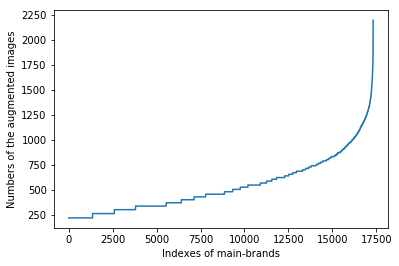

In [17]:
plt.plot(range(len(aug_num)), aug_num)
plt.xlabel('Indexes of main-brands')
plt.ylabel('Numbers of the augmented images')
plt.savefig('./main_brand.jpg')

In [ ]:
    # determine the number of pictures augmented by each method
    train_num_data_primary = list(map(lambda t: int(t), train_num_data_primary))
    for i in range(len(train_num_data_primary)):
        number = 0
        count = 0
        times = new_num[i] // train_num_data_primary[i]
        index = [0] * train_num_data_primary[i]
        for j in range(train_num_data_primary[i]):
            raw_pic = train_sorted_content[i][j][0]
            img_dir = os.path.join(train_files, str(raw_pic) + '.jpg')
            if not os.path.exists(img_dir):
                break
            for k in range(times):
                count = np.mod(count + 1, 16)
                if count == 0:
                    # augmentation with gaussian noise
                    guass(img_dir,aug_files, index[j])
                    index[j] += 1
                elif count == 1:
                    # augmentation with brightness
                    brightness(img_dir,aug_files, index[j])
                    index[j] += 1
                elif count == 2:
                    # augmentation with contrast
                    contrast(img_dir,aug_files, index[j])
                    index[j] += 1
                elif count == 3:
                    # augmentation with sharpness
                    sharpness(img_dir,aug_files, index[j])
                    index[j] += 1
                elif count in [4, 5]:
                    # augmentation with saturation
                    saturation(img_dir,aug_files, index[j])
                    index[j] += 1
                else:
                    # augmentation with slant
                    slant(img_dir,aug_files, index[j])
                    index[j] += 1
                number += 1
        if number < new_num[i]:
            append_num = new_num[i] - number
            pics_index = 0
            for j in range(append_num):
                raw_pic = train_sorted_content[i][pics_index][0]
                img_dir = os.path.join(train_files, str(raw_pic) + '.jpg')
                if not os.path.exists(img_dir):
                    break
                count = np.mod(count + 1, 16)
                if count == 0:
                    # augmentation with Gaussian noise
                    guass(img_dir,aug_files, index[pics_index])
                    index[pics_index] += 1
                elif count == 1:
                    # augmentation with brightness
                    brightness(img_dir,aug_files, index[pics_index])
                    index[pics_index] += 1
                elif count == 2:
                    # augmentation with contrast
                    contrast(img_dir,aug_files, index[pics_index])
                    index[pics_index] += 1
                elif count == 3:
                    # augmentation with sharpness
                    sharpness(img_dir,aug_files, index[pics_index])
                    index[pics_index] += 1
                elif count in [4, 5]:
                    # augmentation with saturation
                    saturation(img_dir,aug_files, index[pics_index])
                    index[pics_index] += 1
                else:
                    # augmentation with slant
                    slant(img_dir,aug_files, index[pics_index])
                    index[pics_index] += 1
                number += 1
                pics_index = np.mod(pics_index + 1, train_num_data_primary[i])
        print('num:{:d}, brand:{:s}'.format(i, train_name_primary[i]))
    for brand in train_sorted_content:
        for picture in brand:
            if not os.path.exists(img_dir):
               break
            shutil.copy(os.path.join(train_files, str(picture[0]) + '.jpg'), \
                os.path.join(aug_files, str(picture[0]) + '_-1_raw_0.jpg'))